The Boston Housing dataset contains information on various factors affecting house prices in Boston, such as crime rate, average number of rooms per dwelling, and property tax rate.

CRIM: Crime rate per capita in the neighborhood.
ZN: Proportion of residential land zoned for large lots.
INDUS: Proportion of non-retail business acres per town.
CHAS: Charles River dummy variable (1 if the tract bounds the river; 0 otherwise).
NOX: Nitrogen oxide concentration (parts per 10 million).
RM: Average number of rooms per dwelling.
AGE: Proportion of houses built before 1940.
DIS: Weighted distance to employment centers (Boston Employment Center).
RAD: Index of accessibility to radial highways.
TAX: Property tax rate per $10,000.
PTRATIO: Pupil-teacher ratio by town.
B: Proportion of residents of African American descent.
LSTAT: Percentage of lower status population.
MEDV: Median value of owner-occupied homes in $1,000s (target variable for prediction).

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# read the csv file
df = pd.read_csv("boston_housing.csv")

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
# check for null values
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
# drop all rows with null values
df = df.dropna()

In [6]:
# the target is medv = median prices
df_x = df
df_y = df['MEDV']

In [10]:
# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)


In [11]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Make predictions
y_pred = model.predict(X_test)

In [25]:
#predicted price
y_pred[0]

np.float64(25.00000000000002)

In [26]:
#actual price
y_test[0]

np.float64(24.0)

In [27]:
# mean squared error and r2 score to evaluate model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Model Performance:
Mean Squared Error (MSE): 5.415480186436852e-28
R² Score: 1.0


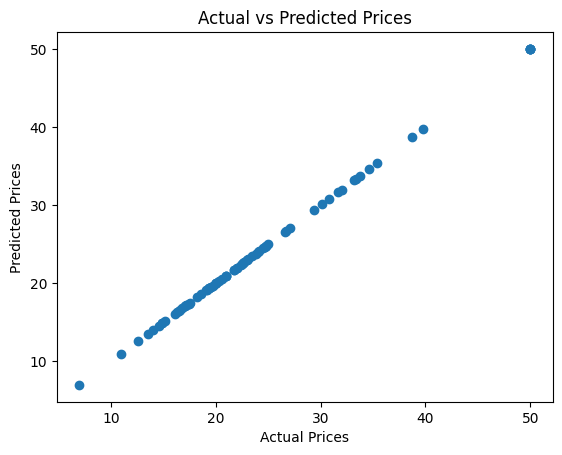

In [22]:
# Plot actual vs predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()